# Stock movement clusters

## Introduction

In this project, we'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). The NumPy array shows movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

![stock](https://img.freepik.com/free-vector/gradient-stock-market-concept_23-2149154185.jpg)

## Modules

In [34]:
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Import Normalizer
from sklearn.preprocessing import Normalizer
# Import normalize
from sklearn.preprocessing import normalize

from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt

# Import TSNE
from sklearn.manifold import TSNE



## Dataset

In [14]:
stock_df = pd.read_csv('company-stock-movements-2010-2015-incl.csv')

stock_df.rename(columns={'Unnamed: 0':'companies'}, inplace=True)

X_stock_df = stock_df.drop(['companies'], axis=1)

movements = X_stock_df.to_numpy()

## Fit Pipeline

In [20]:
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

## Predict

In [21]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
companies = stock_df['companies']
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
0        0                               Apple
34       1                          Mitsubishi
45       1                                Sony
21       1                               Honda
48       1                              Toyota
7        1                               Canon
15       1                                Ford
8        2                         Caterpillar
10       2                      ConocoPhillips
12       2                             Chevron
13       2                   DuPont de Nemours
57       2                               Exxon
32       2                                  3M
53       2                       Valero Energy
44       2                        Schlumberger
39       2                              Pfizer
5        3                     Bank of America
1        3                                 AIG
26       3                      JPMorgan Chase
3        3                    American express
18       3   

## Hierarchies of stocks

In [32]:
movements_companies = movements[:60]
len(companies)

60

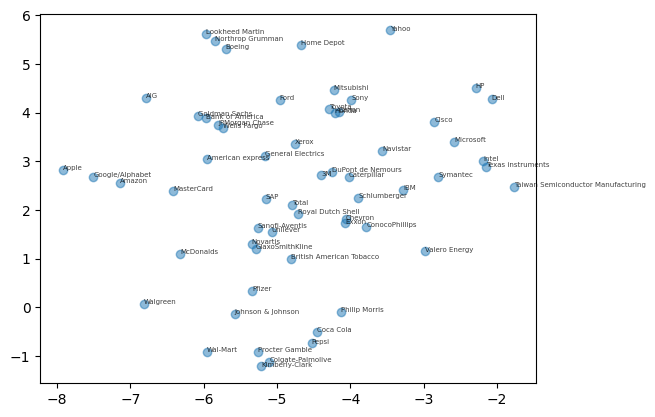

In [35]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements_companies)

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

